 Versuch 1
 ======
 
 Thema
 ------

In diesem Versuch wird ein CNN trainiert. Ziel ist die Klassifizierung von Bildern   
in zwei Klassen. Dies sind unbefestigte oder befestigte Wege. Hierfür verwende ich relativ einfache Methoden.   
Es geht darum einen ersten Versuch für eine Klassifizierung von Fahrradwegen zu unternehmen.

 Versuchsaufbau
 ------
 
Als Bibliothek wird Keras mit Tensorflow als Backend verwendet.
Die Trainingsdaten wurden manuell gelabelt und stammen aus dem Datensatz Nummer vier.   
Siehe auch die Excel Datei Beschreibung der Datensätze.
In der folgenden Tabelle gibt es einen Überblick über die verwendeten Bilder. 

**Anzahl der Bilder **|**Klassen**|**Kameraauflösung**|**Größe des Ausschnitts**| |**Bildgröße reduziert**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
2000|unbefestigt(664 Bilder), befestigt (1336)|960px x 1280px|450px x 600px| |108px x 144px

Das verwendete CNN hat die folgenden Parameter. Verarbeitet werden Grauwertbilder.

**Anzahl der Conv-Layer**|**Dense-Layer**|**Aktivierungsfunktion**|**Regularisierung **|**Optimierer **
:-----:|:-----:|:-----:|:-----:|:-----:
2|2|ReLu|Dropout|RMSprop

 Ergebnis
 ------
 
 Die Accurancy der Testdaten von 400 Bildern beträgt 0,9125%. Mit einem Loss von ca. 0.2644%.   
 Nach der Konfusionsmatrix wurden 24 Bild als falsch befestigt klassifiziert. Dabei wurden 11 Bilder als   
 falsch unbefestigt klassifiziert.
 Die Zeit zum Trainieren des CNN dauerte 353s mit 10 Epochen. Hierbei wurde eine GTX 1050Ti genutzt.
 
 
 Auswertung
 ------
 
Das Ergebnis hat gezeigt das es generell möglich ist mit Bildern den Untergrund zu klassifizieren.    
Allerdings wurde in diesem Versuch nur ein relativer kleiner Datensatz verwendet. Die Bilder wurden   
kontinuierlich aufgenommen und zeigen eine Wegstrecke von ca 940m. Also eine zu kurze Strecke um ein repräsentatives Ergebnis darzustellen.   
Die Trainingsdaten enthalten mehr Bilder der Klasse "befestigt". Besser wäre es, wenn zu beiden Klassen die gleiche Anzahl an Bildern hätten.

In [1]:
import tensorflow
tensorflow.__version__

'1.1.0'

In [2]:
import os
import cv2
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import numpy as np
import pandas
import datetime as dt

ModuleNotFoundError: No module named 'keras'

In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
# Um Grafiken zu plotten
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn

In [6]:
# dirs beinhaltet eine List mit allen Dateien des angegebenen Ordners
path = os.getcwd()
image_path = path + '/grauwertbilder'
dirs = os.listdir(image_path)

/home/nbuser/library/maschinelles_Lernen


In [6]:
def save_fig(fig_id):
    pathSave = fig_id + ".png"
    plt.savefig(pathSave, format='png', dpi=300)

In [7]:
# Anzahl der Farbkanäle
numberOfChannels = 1
# Lade alle Bider des angegebenen Ordners in eine Liste
images=[]
for file in dirs:
    if "jpg" not in file:   
        continue
    mages.append(cv2.imread(image_path + '/'+ file, cv2.COLOR_BGR2GRAY))
    
img_data = np.array(images)
img_data = img_data.astype('float32')
# Transfomierung der Bildpunkte auf den Wetebereich von 0 bis 1
img_data /= 255
print (img_data.shape)

(2000, 144, 108)


In [8]:
# Für Tensorflow Backend müssen die Anzahl der Farbkanäle als letzte Dimension angegeben werden in dem Array
if numberOfChannels == 1:
    img_data= img_data[:,np.newaxis]
    img_data=np.rollaxis(img_data,numberOfChannels,4)
    print (img_data.shape)

(2000, 144, 108, 1)


In [9]:
numberOfClasses = 2
# Namen der Klassen
classNames = ['befestigt','unbefestigt']
num_of_samples = img_data.shape[0]
labelsNp = np.ones((num_of_samples,),dtype='int32')

In [10]:
# Lade CSV Datei mit den enthaltenen Features
dfFeatures = pandas.read_csv(filepath_or_buffer="features.csv") 
dfFeatures.drop(columns=['Unnamed: 0'], inplace=True)
dfFeatures.head(5)

,0,Millisekunden,Breitengrad,Laengengrad,Geschwindigkeit,Klasse
0,0,1517406329935,53.613636,53.613636.1,2.430,0
1,0,1517406330272,53.613636,53.613636,4.860,0
2,1,1517406330561,53.613636,53.613636,4.860,0
3,2,1517406330997,53.613632,53.613632,6.264,0
4,3,1517406331103,53.613632,53.613632,7.668,0


In [11]:
# Von den Dataframe wird die letzte Spalte selektiert
labelsNp = dfFeatures.iloc[:,-1]
labelsNp.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Klasse, dtype: int64

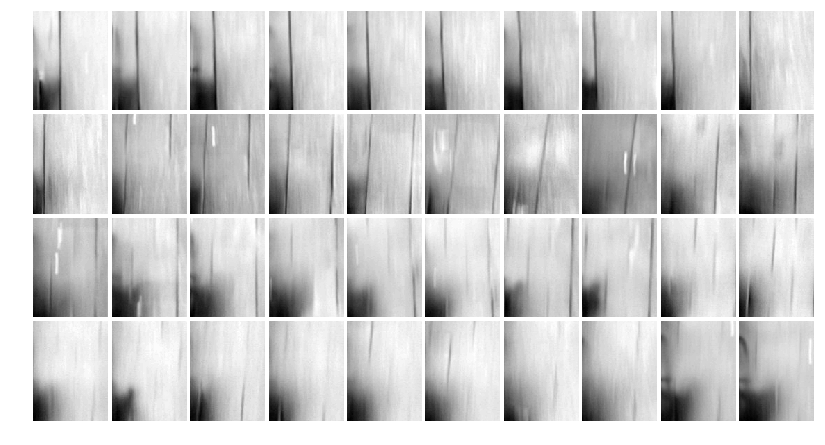

In [12]:
# Plot Beispiel Bilder
fig = plt.figure(1, figsize=(14,14))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 10), axes_pad=0.05)
imageToShow = 40
for i, img in enumerate(images[400: 400 + imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()

In [13]:
# Erstellt einen "one hot encoding" für die gelabelten Daten
Y = np_utils.to_categorical(labelsNp, 0)

In [14]:
# Setzten des RandomState um reproduzierbare Ergebnisse zu erzielen.
np.random.seed(9)

In [15]:
# Mischen der Trainingsdaten
x,y = shuffle(img_data,Y)
# Aufteilung in Trainings und Testdaten
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
# Parameter für das CNN
input_shape    = img_data[0].shape
numNeurons_C1  = 32     
numNeurons_C2  = 64     
numNeurons_D1  = 64    
convKernelSize = 3    

In [17]:
model = Sequential()

model.add(Conv2D(numNeurons_C1, (convKernelSize, convKernelSize), padding='valid',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(numNeurons_C2, (convKernelSize, convKernelSize)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(numNeurons_D1))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(numberOfClasses))
model.add(Activation('softmax'))

In [18]:
# Zusammenfassung des neuralen Netzes
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 142, 106, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 142, 106, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 71, 53, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 71, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 51, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 69, 51, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 25, 64)        0         
__________

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [20]:
num_epoch=10
start = dt.datetime.now()
hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))
end = dt.datetime.now()
print('Trainings Zeit {} s.'.format((end - start).seconds))

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 37s 23ms/step - loss: 2.7535 - acc: 0.6569 - val_loss: 0.6503 - val_acc: 0.6575
Epoch 2/10
1600/1600 [==============================] - 35s 22ms/step - loss: 0.5691 - acc: 0.7356 - val_loss: 0.6528 - val_acc: 0.8350
Epoch 3/10
1600/1600 [==============================] - 35s 22ms/step - loss: 0.4310 - acc: 0.8375 - val_loss: 0.3827 - val_acc: 0.8725
Epoch 4/10
1600/1600 [==============================] - 36s 23ms/step - loss: 0.3944 - acc: 0.8456 - val_loss: 0.3407 - val_acc: 0.8725
Epoch 5/10
1600/1600 [==============================] - 35s 22ms/step - loss: 0.3688 - acc: 0.8500 - val_loss: 0.3323 - val_acc: 0.8750
Epoch 6/10
1600/1600 [==============================] - 35s 22ms/step - loss: 0.3451 - acc: 0.8594 - val_loss: 0.2946 - val_acc: 0.8775
Epoch 7/10
1600/1600 [==============================] - 35s 22ms/step - loss: 0.3380 - acc: 0.8512 - val_loss: 0.2958 - val_acc: 0.8650
E

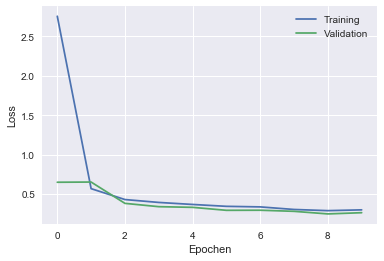

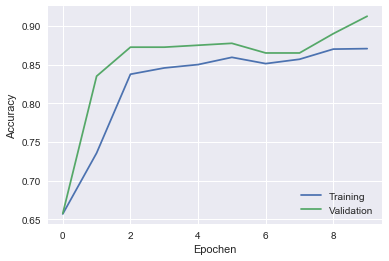

In [29]:
plt.figure(4)
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.grid(True)
save_fig('Versuch_1_Loss')
plt.figure(1)
plt.xlabel('Epochen')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')
plt.grid(True)
save_fig('Versuch_1_Accurancy')
plt.show()

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.264379508197
Test accuracy: 0.9125


In [23]:
test_image = X_test[2:3]
print (test_image.shape)
print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[2:3])

(1, 144, 108, 1)
[[ 0.94436753  0.05563249]]
1/1 [==============================] - 0s 8ms/step
[0]
[[ 1.  0.]]


In [24]:
valid_preds = model.predict(X_test)
valid_preds = np.argmax(valid_preds, axis=1)
y_test_max = np.argmax(y_test,axis=1)

In [25]:
# Konfusionsmatrix
cnf_matrix = confusion_matrix(y_test_max, valid_preds)
print(cnf_matrix)

[[252  11]
 [ 24 113]]


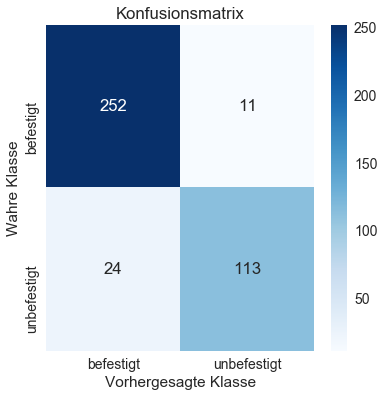

In [26]:
seaborn.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(6,6)) 
ax = seaborn.heatmap(cnf_matrix, fmt="d", cmap=plt.cm.Blues, ax=ax , annot=True)
ax.set_xticklabels(classNames)
ax.set_yticklabels(classNames)
plt.title('Konfusionsmatrix')
plt.ylabel('Wahre Klasse')
plt.xlabel('Vorhergesagte Klasse')
save_fig('Versuch_1_Konfusionsmatrix')
plt.show();

In [27]:
predicted_classes = model.predict_classes(X_test)   
y_test_number = np.argmax(y_test, axis=1)
incorrect = []
for i, y in enumerate(y_test_number):
    if y != predicted_classes[i]:
        incorrect.append(i)

400/400 [==============================] - 2s 5ms/step


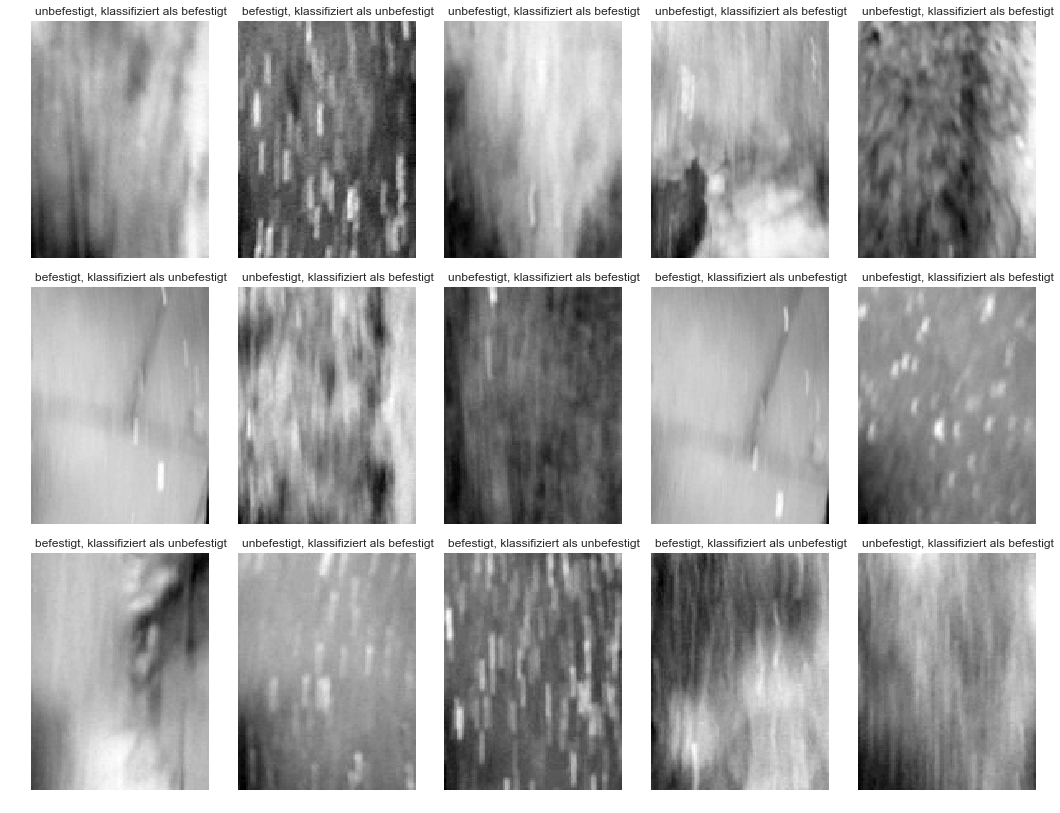

In [28]:
# Plot falsch vorhergesagte Bilder
seaborn.set(font_scale=1)
fig = plt.figure(1, figsize=(18,18))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 5), axes_pad=0.4)
for i, incorr in enumerate(incorrect[0:15]):
    ax = grid[i]
    ax.imshow(X_test[incorr].reshape(144,108), cmap='gray')
    ax.text(2,-6, classNames[y_test_number[incorr]] + ", klassifiziert als " + classNames[predicted_classes[incorr]], verticalalignment='center')
    ax.axis('off')
save_fig('Versuch_1_falsch_vorhergesagte_Bilder')
plt.show();